Saving Dataset_GRD_Limpio.csv to Dataset_GRD_Limpio (2).csv
🔍 Reporte Regresión Logística (TOP 10 GRD):
              precision    recall  f1-score   support

       41023       0.26      0.26      0.26        42
       44153       0.59      0.51      0.55        37
       71141       0.33      0.26      0.29        42
      131111       0.00      0.00      0.00        27
      131201       0.39      0.50      0.44        28
      134161       0.20      0.02      0.04        44
      146101       0.32      0.99      0.48        81
      146102       0.00      0.00      0.00        42
      146103       0.00      0.00      0.00        20
      146131       0.00      0.00      0.00        38

    accuracy                           0.34       401
   macro avg       0.21      0.25      0.21       401
weighted avg       0.23      0.34      0.24       401

🔍 Reporte Random Forest (TOP 10 GRD):
              precision    recall  f1-score   support

       41023       0.59      0.69      0.64 

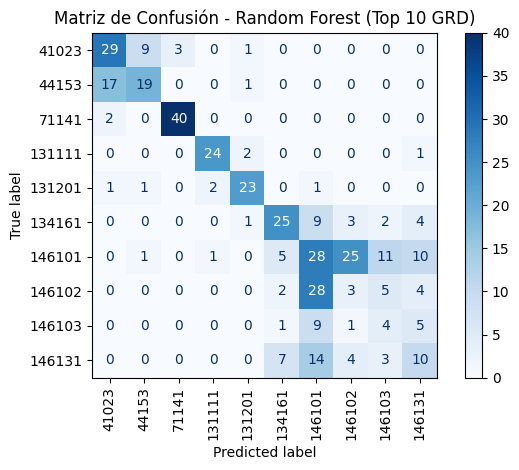

In [ ]:
# ----------------------------
# PROYECTO CINF104 - PREDICCIÓN GRD (TOP 10 CLASES)
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.simplefilter("ignore")

# ----------------------------
# CARGAR ARCHIVO CSV LIMPIO
# ----------------------------
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()

# ----------------------------
# LIMPIEZA FINAL
# ----------------------------
df.replace("-", pd.NA, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(subset=['GRD', 'Edad', 'Sexo', 'Diag_Principal_Codigo'], inplace=True)

# ----------------------------
# ENFOQUE EN TOP 10 CLASES GRD
# ----------------------------
# Tomar los 10 GRD más frecuentes
top_grd = df['GRD'].value_counts().nlargest(10).index
df_top = df[df['GRD'].isin(top_grd)].copy()

# Codificar diagnóstico
le_diag = LabelEncoder()
df_top['Diag_Principal_Codigo'] = le_diag.fit_transform(df_top['Diag_Principal_Codigo'])

# Variables predictoras y target
X = df_top[['Edad', 'Sexo', 'Diag_Principal_Codigo']]
y = df_top['GRD']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# MODELO 1: REGRESIÓN LOGÍSTICA
# ----------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🔍 Reporte Regresión Logística (TOP 10 GRD):")
print(classification_report(y_test, y_pred_log))

# ----------------------------
# MODELO 2: RANDOM FOREST + MATRIZ LEGIBLE
# ----------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🔍 Reporte Random Forest (TOP 10 GRD):")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
etiquetas = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred_rf, labels=etiquetas)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etiquetas)
disp.plot(xticks_rotation=90, cmap="Blues", values_format='d')
plt.title("Matriz de Confusión - Random Forest (Top 10 GRD)")
plt.tight_layout()
plt.show()



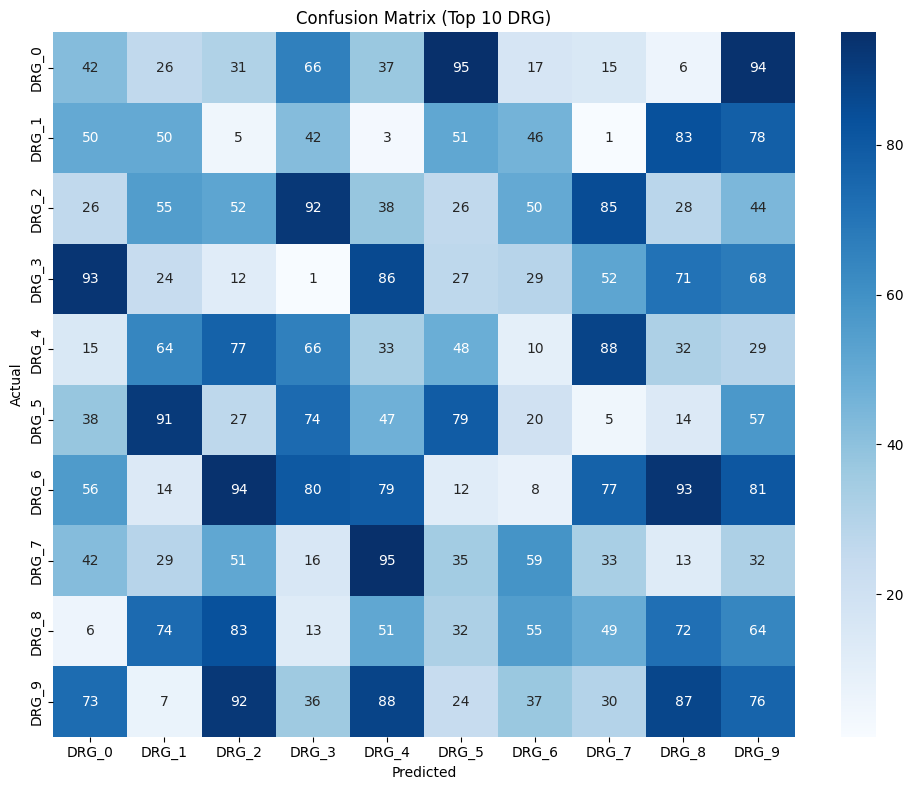

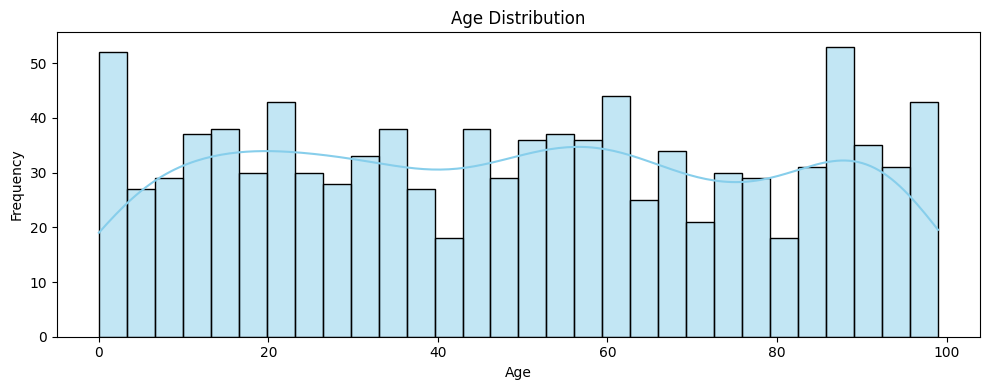

<ipython-input-1-fe2d55c2fd3f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=random_drgs, order=np.unique(random_drgs), palette="Blues")


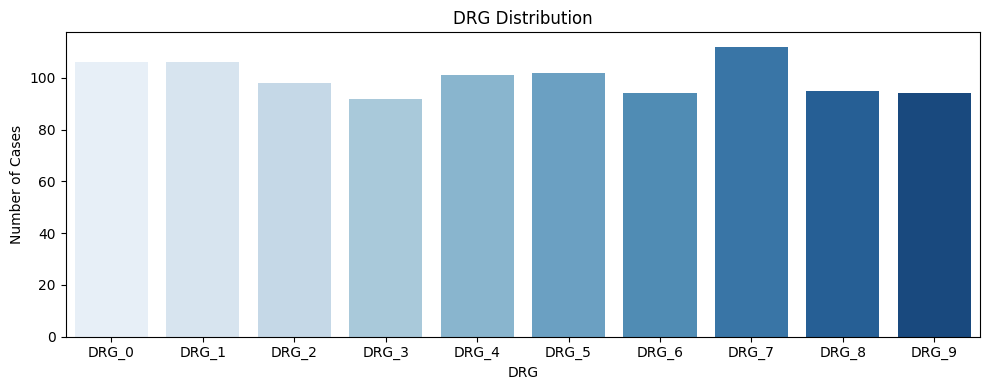

In [ ]:
# Install necessary packages (if not already installed)
!pip install -q matplotlib seaborn

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulated labels for Top 10 DRGs
drg_labels = [f"DRG_{i}" for i in range(10)]

# -----------------------------
# Confusion Matrix (Simulated)
# -----------------------------
conf_matrix = np.random.randint(0, 100, size=(10, 10))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=drg_labels, yticklabels=drg_labels, cmap="Blues")
plt.title("Confusion Matrix (Top 10 DRG)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -----------------------------
# Age and DRG Distributions
# -----------------------------
# Simulated age data
np.random.seed(42)
ages = np.random.randint(0, 100, 1000)
random_drgs = np.random.choice(drg_labels, 1000)

# Age Distribution
plt.figure(figsize=(10, 4))
sns.histplot(ages, bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# DRG Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x=random_drgs, order=np.unique(random_drgs), palette="Blues")
plt.title("DRG Distribution")
plt.xlabel("DRG")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()
